In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from dateutil.relativedelta import relativedelta as rd

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
date = session.query(measurement.date).order_by(measurement.date.desc()).first()[0]

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date = dt.datetime.strptime(date, '%Y-%m-%d')
recent_date = recent_date.date() 
recent_date

# Calculate the date one year from the last date in data set.
last_year = recent_date + rd(months=-12)
last_year


# Perform a query to retrieve the data and precipitation scores
perc_score = session.query(measurement.date, measurement.prcp).filter(measurement.date >= last_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(perc_score, columns = ['Date', 'Perc'])
df.head()

# Sort the dataframe by date
df.sort_values('Date')


,Date,Perc
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


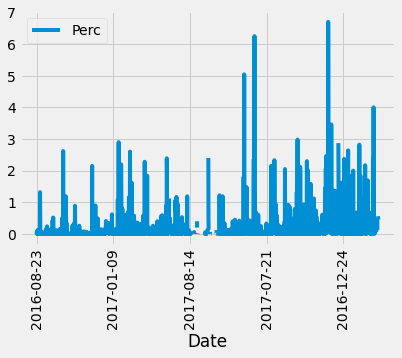

In [34]:
# Use Pandas Plotting with Matplotlib to plot the data
fig = df.plot(x='Date')
plt.xticks(rotation=90)
plt.savefig('Images/precipitation.jpg')

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Perc
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
num_of_station = session.query(station.station).count()
print('Numbers of Stations in Hawaii: ' , num_of_station)

Numbers of Stations in Hawaii:  9


In [14]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_freq = session.query(measurement.station)
sation_freq_df = pd.DataFrame(station_freq).value_counts().rename_axis('Station').reset_index(name='Counts')
sation_freq_df

,Station,Counts
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [36]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station_id = sation_freq_df['Station'][0]
active_station_id

'USC00519281'

In [65]:
# Using the most active station id, # calculate the lowest, highest, and average temperatures.
max_temp = session.query(func.max(measurement.tobs)).filter(measurement.station == active_station_id).one()
min_temp = session.query(func.min(measurement.tobs)).filter(measurement.station == active_station_id).one()
avg_temp = session.query(func.avg(measurement.tobs)).filter(measurement.station == active_station_id).one()


In [86]:
print("Max Temp for station USC00519281 is:", max_temp, "\nMin Temp for station USC00519281 is:", min_temp, "\nAve Temp for station USC00519281 is:", avg_temp)

Max Temp for station USC00519281 is: (85.0,) 
Min Temp for station USC00519281 is: (54.0,) 
Ave Temp for station USC00519281 is: (71.66378066378067,)


In [97]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp = session.query(measurement.station, measurement.tobs).filter(measurement.date >= last_year).filter(measurement.station == active_station_id).all()
temp_df = pd.DataFrame(temp, columns = ["Station", "Tempreture"])
temp_df

,Station,Tempreture
0,USC00519281,77.0
1,USC00519281,77.0
2,USC00519281,80.0
3,USC00519281,80.0
4,USC00519281,75.0
...,...,...
347,USC00519281,77.0
348,USC00519281,77.0
349,USC00519281,76.0
350,USC00519281,76.0


<AxesSubplot:ylabel='Frequency'>

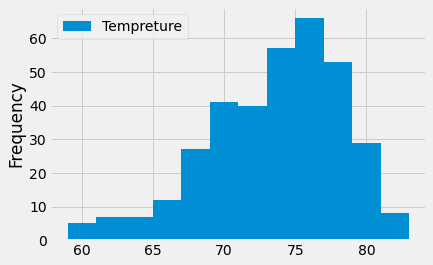

In [98]:
temp_df.plot.hist(bins=12)

# Close session

In [99]:
# Close Session
session.close()